## Lab 6 - Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#settings for seaborn plots
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11,6)})

#code to ensure path
try:
  drive_path
except NameError:
  drive_path = ''

#load dataset
df = pd.read_csv(drive_path + 'diabetes_risk_prediction_dataset.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## Data Exploration

In [2]:
#understanding rows and attribute types
print('No. of records and attributes: ',df.shape)
print('List of attributes: ',df.columns)
display(df.info())

No. of records and attributes:  (520, 17)
List of attributes:  Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itc

None

In [3]:
#exploring basic distribution of numerical data
df.select_dtypes(['int64','float64']).describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [4]:
#exploring categotical data
df.select_dtypes(['object']).describe()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320


In [5]:
# Assuming 'positive' is the positive class and 'negative' is the negative class
class_mapping = {'Positive': 1, 'Negative': 0}
df['class'] = df['class'].replace(class_mapping).astype(int)
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,1
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,1
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,1
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,1
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,1
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,1
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,1
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,0


In [6]:
#check values of each categorical attribute
cat_attributes = df.select_dtypes(['object']).columns
for i in cat_attributes:
  values = df[i].unique().tolist()
  print(i,': ',values)

Gender :  ['Male', 'Female']
Polyuria :  ['No', 'Yes']
Polydipsia :  ['Yes', 'No']
sudden weight loss :  ['No', 'Yes']
weakness :  ['Yes', 'No']
Polyphagia :  ['No', 'Yes']
Genital thrush :  ['No', 'Yes']
visual blurring :  ['No', 'Yes']
Itching :  ['Yes', 'No']
Irritability :  ['No', 'Yes']
delayed healing :  ['Yes', 'No']
partial paresis :  ['No', 'Yes']
muscle stiffness :  ['Yes', 'No']
Alopecia :  ['Yes', 'No']
Obesity :  ['Yes', 'No']


<AxesSubplot: xlabel='class', ylabel='count'>

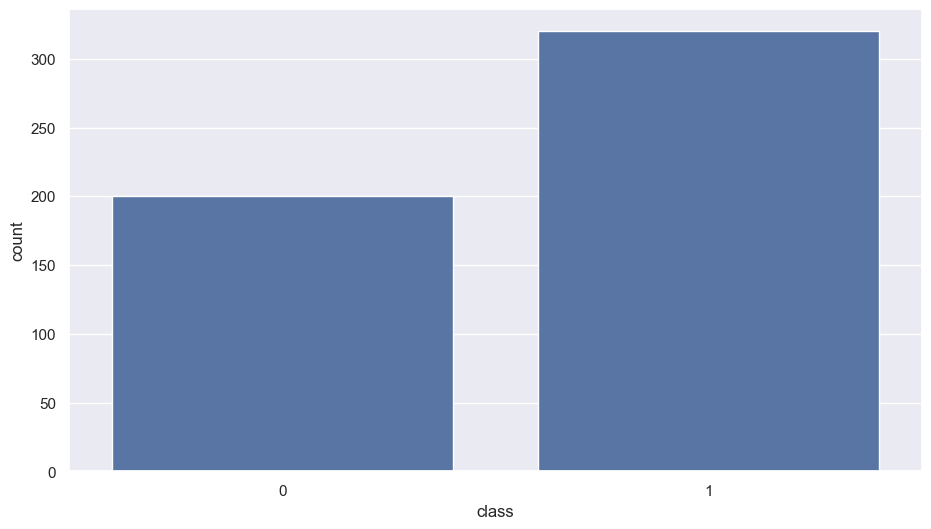

In [7]:
sns.countplot(x='class', data = df)

In [8]:
#replace with NaN
df_cat = df.select_dtypes(['object'])
df_cat.replace(['unknown','nonexistent'],np.nan,inplace=True)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              520 non-null    object
 1   Polyuria            520 non-null    object
 2   Polydipsia          520 non-null    object
 3   sudden weight loss  520 non-null    object
 4   weakness            520 non-null    object
 5   Polyphagia          520 non-null    object
 6   Genital thrush      520 non-null    object
 7   visual blurring     520 non-null    object
 8   Itching             520 non-null    object
 9   Irritability        520 non-null    object
 10  delayed healing     520 non-null    object
 11  partial paresis     520 non-null    object
 12  muscle stiffness    520 non-null    object
 13  Alopecia            520 non-null    object
 14  Obesity             520 non-null    object
dtypes: object(15)
memory usage: 61.1+ KB


<AxesSubplot: >

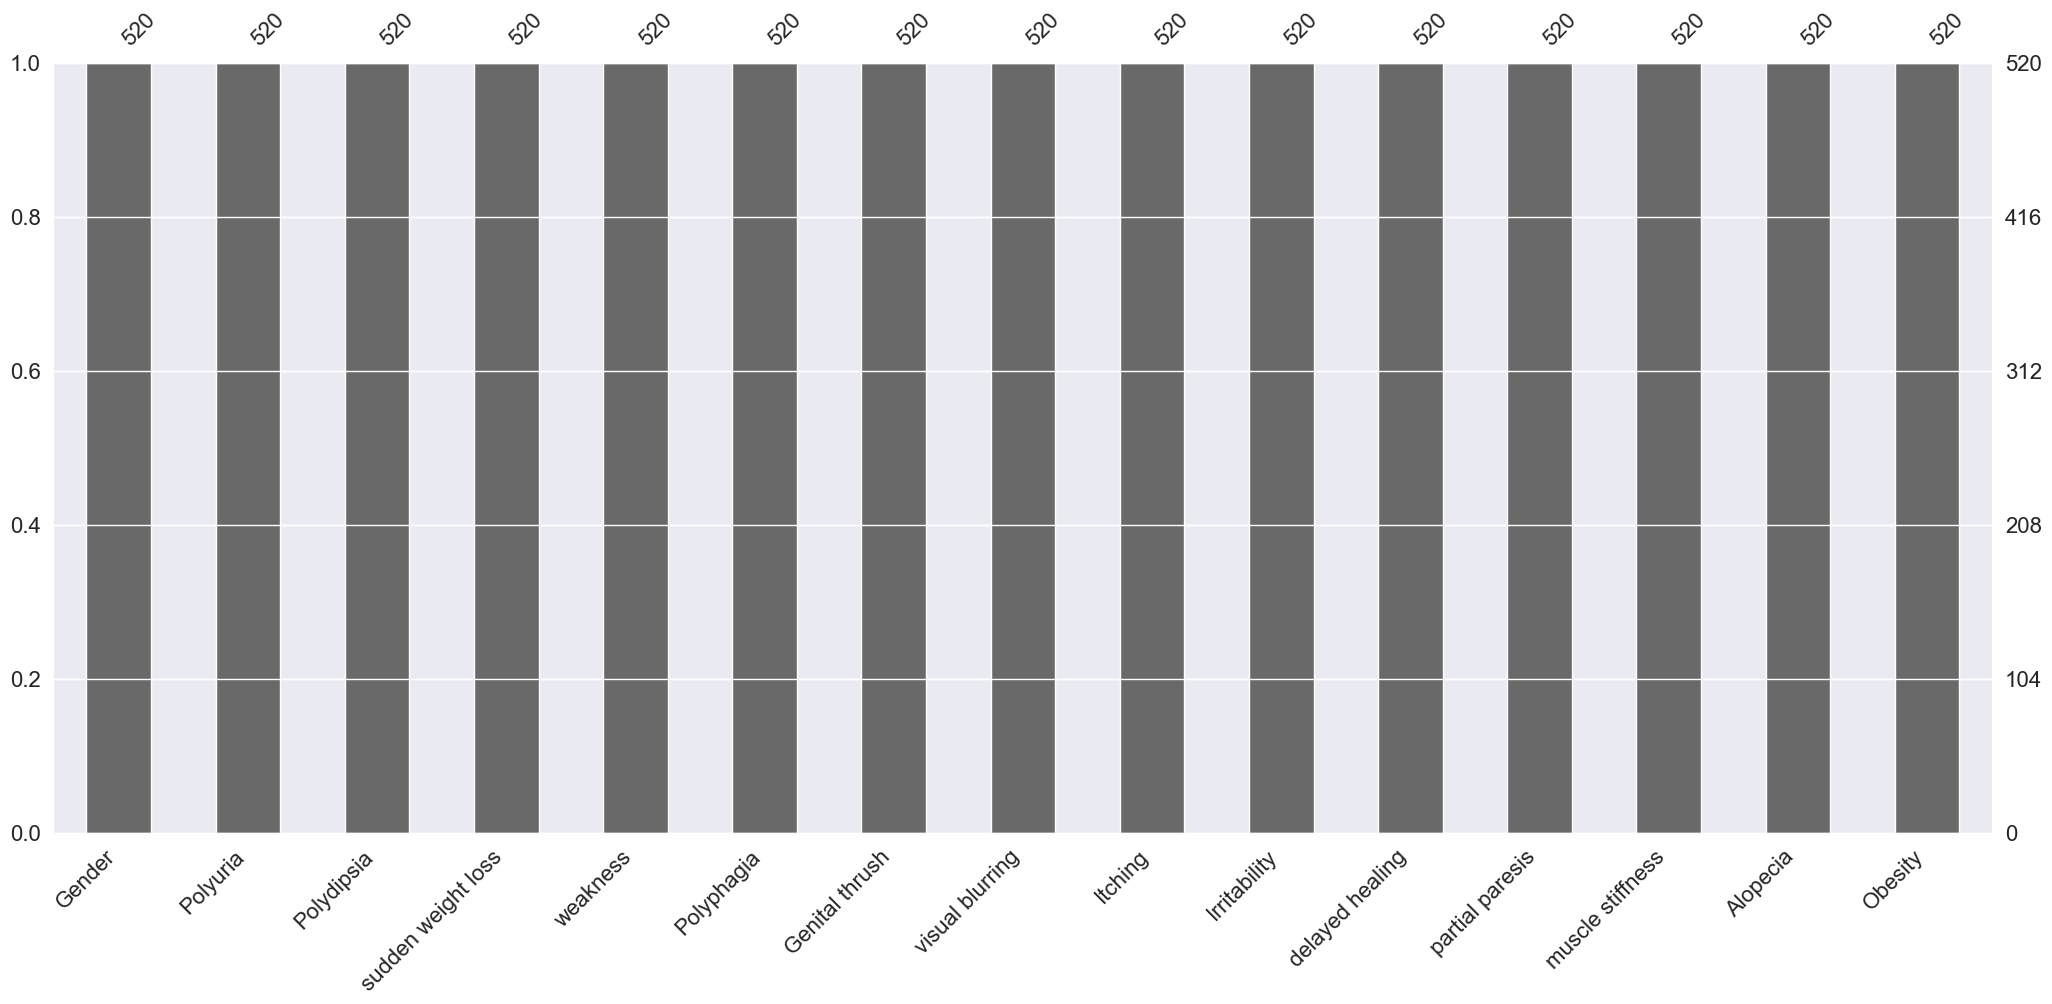

In [9]:
import missingno as msno

msno.bar(df_cat) #visualilze missing data in categorical attributes

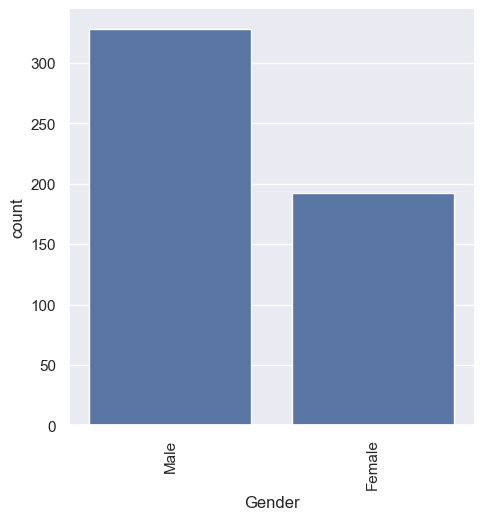

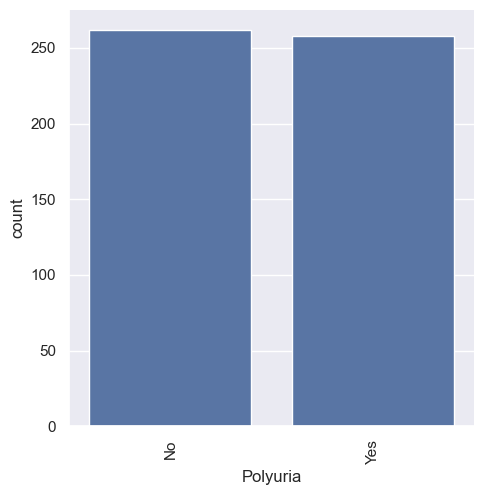

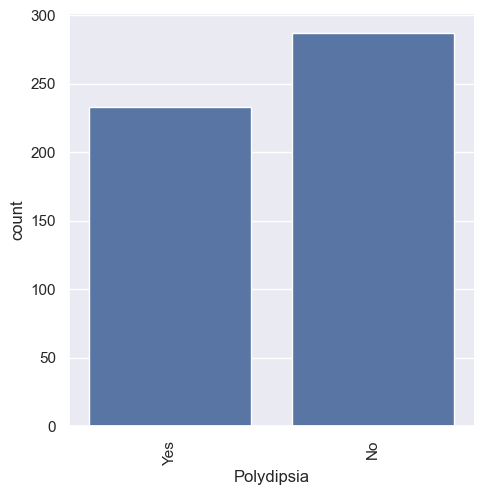

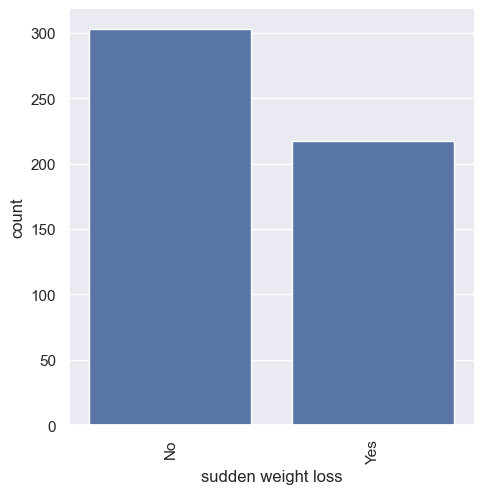

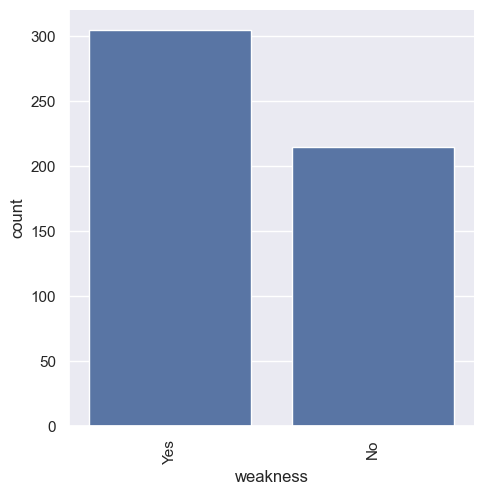

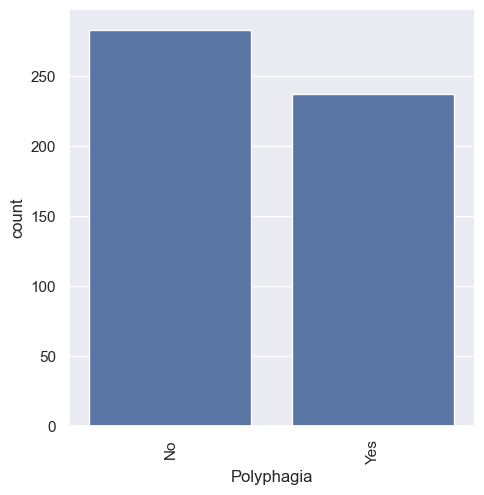

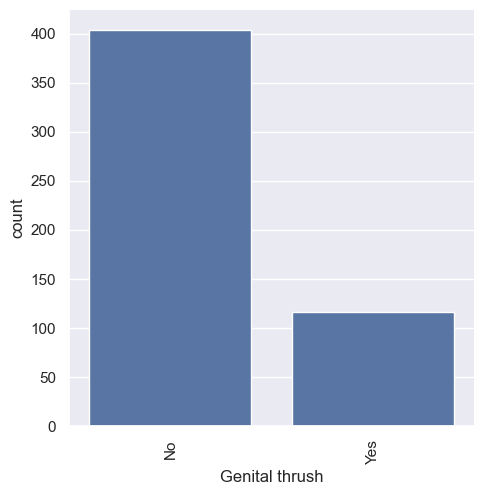

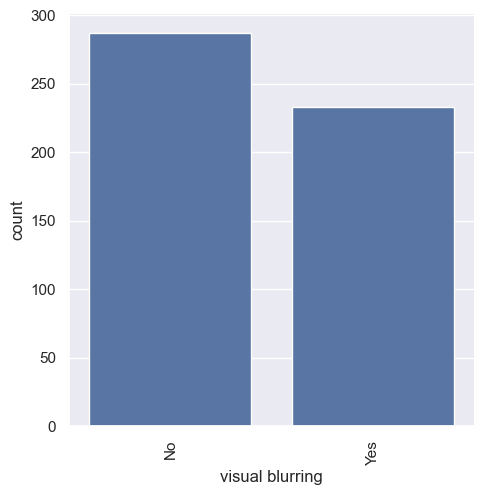

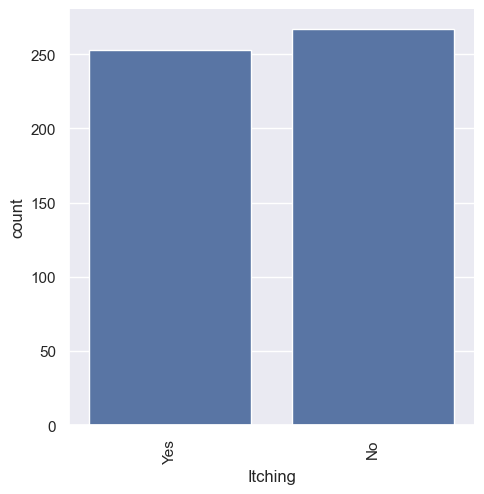

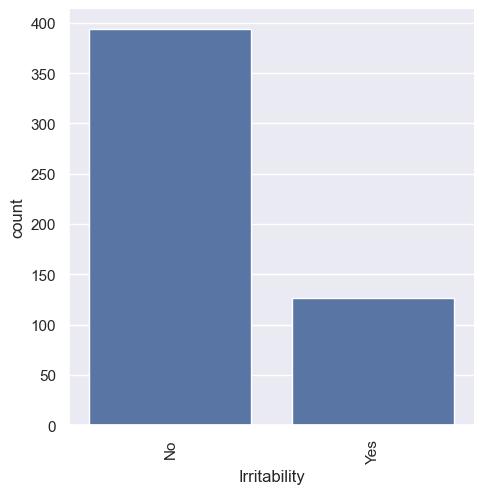

In [10]:
for i in range(10):
  ax = sns.catplot(data=df,x=cat_attributes[i],kind='count')
  ax.set_xticklabels(rotation=90)

## Data Preprocessing

In [11]:
df_pp = df.copy()
for i in cat_attributes:
  values = df_pp[i].unique().tolist()
  print(i,': ',values)

Gender :  ['Male', 'Female']
Polyuria :  ['No', 'Yes']
Polydipsia :  ['Yes', 'No']
sudden weight loss :  ['No', 'Yes']
weakness :  ['Yes', 'No']
Polyphagia :  ['No', 'Yes']
Genital thrush :  ['No', 'Yes']
visual blurring :  ['No', 'Yes']
Itching :  ['Yes', 'No']
Irritability :  ['No', 'Yes']
delayed healing :  ['Yes', 'No']
partial paresis :  ['No', 'Yes']
muscle stiffness :  ['Yes', 'No']
Alopecia :  ['Yes', 'No']
Obesity :  ['Yes', 'No']


In [12]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Check if 'class' column exists and is not empty
target_column = 'class'
if target_column in df_pp.columns and not df_pp[target_column].empty:
    X = df_pp.loc[:, df_pp.columns != target_column]
    y = df_pp.loc[:, df_pp.columns == target_column]

    # Check for missing values in 'class'
    if y.isnull().values.any():
        print("There are missing values in the 'class' column.")
    else:
        #split to train and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0, stratify=y)
else:
    print(f"The '{target_column}' column is missing or empty in the DataFrame.")

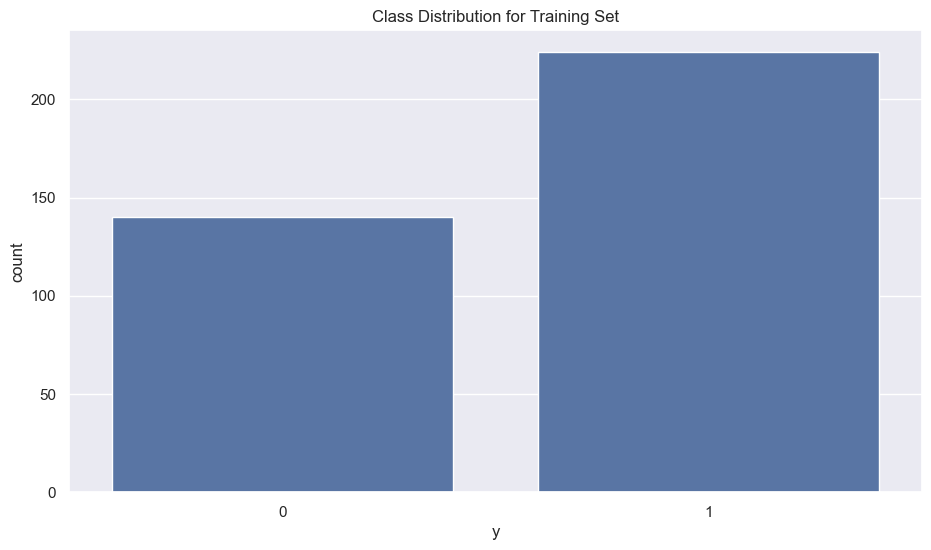

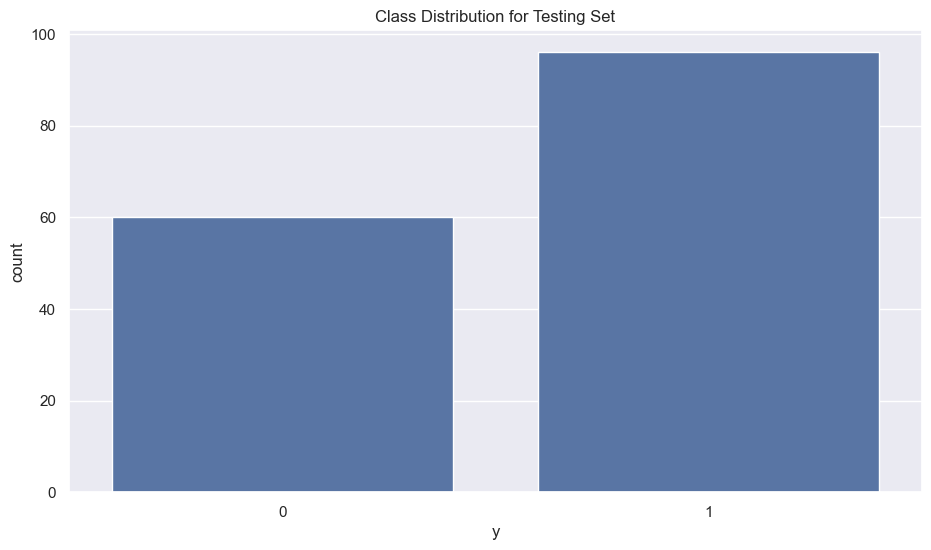

In [13]:
#visualize classes after splitting
plt.figure()
sns.countplot(x='y', data = pd.DataFrame({'y':y_train}))
plt.title('Class Distribution for Training Set')
plt.show()
plt.figure()
sns.countplot(x='y', data = pd.DataFrame({'y':y_test}))
plt.title('Class Distribution for Testing Set')
plt.show()

In [14]:
display(X_test)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
33,54,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
209,43,Male,No,No,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,No
451,60,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes
89,35,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No
441,60,Male,Yes,No,No,No,No,No,Yes,No,No,No,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,27,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No
28,38,Male,No,Yes,No,No,No,Yes,No,No,No,No,No,No,Yes,No
444,30,Female,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes,No,No,No,No
465,27,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No


In [15]:
# # Check if 'class' column is in X_train
# target_column = 'class'
# if target_column in X_train.columns:
#     cat_index = [X_train.columns.get_loc(i) for i in cat_attributes]
#     display(cat_index)
# else:
#     print(f"The '{target_column}' column is not present in X_train.")

#get index of categorical attributes
cat_index = []
for i in cat_attributes:
  cat_index.append(X_train.columns.get_loc(i))
display(cat_index)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [16]:
#normalize numerical attributes
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_preprocess = X_train.copy()
num_attributes = X_train.select_dtypes(['int64','float64']).columns
X_train_preprocess[num_attributes] = min_max_scaler.fit_transform(X_train_preprocess[num_attributes])
# X_train_preprocess = pd.DataFrame(X_train_preprocess, columns = num_attributes)
display(X_train_preprocess)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
224,0.661538,Male,No,No,No,Yes,Yes,No,Yes,Yes,No,Yes,No,No,Yes,No
269,0.353846,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
162,0.153846,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No
115,0.307692,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No
278,0.200000,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,0.600000,Male,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No
425,0.569231,Male,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
334,0.323077,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No
76,0.353846,Female,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,No


In [17]:
from imblearn.over_sampling import SMOTENC

ovr_samp = SMOTENC(random_state=0, categorical_features=cat_index)
X_ovr_samp,y_ovr_samp=ovr_samp.fit_resample(X_train_preprocess, y_train)
X_ovr_samp = pd.DataFrame(data=X_ovr_samp,columns=X_train_preprocess.columns)

In [18]:
X_ovr_samp.shape

(448, 16)

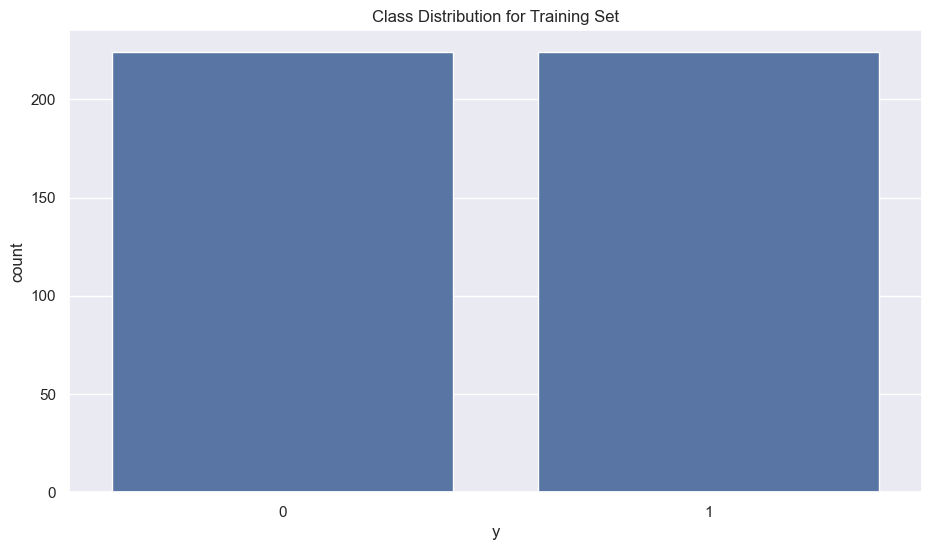

In [19]:
plt.figure()
sns.countplot(x='y', data = pd.DataFrame(data=y_ovr_samp,columns=['y']))
plt.title('Class Distribution for Training Set')
plt.show()

## Classification

### Logistic Regression

In [20]:
X_train_rows = len(X_ovr_samp) #save the number of rows of training data
X_train_test = pd.concat(objs=[X_ovr_samp, X_test], axis=0) #concatenate the training and testing attributes
X_train_test_onehot = pd.get_dummies(X_train_test, columns=cat_attributes) #convert categorical attributes to one hot encoding format

#split the training and testing attributes back into individual variables
X_train_onehot = X_train_test_onehot[:X_train_rows]
X_test_onehot = X_train_test_onehot[X_train_rows:]

display(X_train_onehot)

,Age,Gender_Female,Gender_Male,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,sudden weight loss_No,sudden weight loss_Yes,weakness_No,...,delayed healing_No,delayed healing_Yes,partial paresis_No,partial paresis_Yes,muscle stiffness_No,muscle stiffness_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes
0,0.661538,False,True,True,False,True,False,True,False,False,...,False,True,True,False,True,False,False,True,True,False
1,0.353846,True,False,False,True,False,True,False,True,False,...,False,True,False,True,False,True,True,False,True,False
2,0.153846,True,False,True,False,True,False,True,False,True,...,True,False,True,False,True,False,True,False,True,False
3,0.307692,True,False,False,True,False,True,False,True,False,...,False,True,False,True,True,False,True,False,True,False
4,0.200000,False,True,True,False,True,False,True,False,True,...,True,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,0.370350,False,True,True,False,True,False,True,False,True,...,True,False,True,False,True,False,False,True,True,False
444,0.049238,False,True,True,False,True,False,True,False,True,...,True,False,True,False,True,False,True,False,True,False
445,0.292308,False,True,False,True,True,False,False,True,False,...,False,True,True,False,True,False,False,True,False,True
446,0.307692,False,True,True,False,True,False,True,False,True,...,True,False,True,False,True,False,True,False,True,False


In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs',max_iter=1000) #initialize logistic regression model
logreg.fit(X_train_onehot, y_ovr_samp) #Train model

#check performance on training set
print('Training accuracy: ', logreg.score(X_train_onehot,y_ovr_samp))

Training accuracy:  0.9575892857142857


In [22]:
X_test_preprocess = X_test_onehot.copy()
X_test_preprocess[num_attributes] = min_max_scaler.transform(X_test_preprocess[num_attributes]) #make sure to use transform here instead of fit_transform
display(X_test_preprocess)

,Age,Gender_Female,Gender_Male,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,sudden weight loss_No,sudden weight loss_Yes,weakness_No,...,delayed healing_No,delayed healing_Yes,partial paresis_No,partial paresis_Yes,muscle stiffness_No,muscle stiffness_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes
33,0.446154,False,True,False,True,False,True,False,True,False,...,False,True,False,True,False,True,True,False,True,False
209,0.276923,False,True,True,False,True,False,False,True,True,...,False,True,True,False,True,False,False,True,True,False
451,0.538462,True,False,False,True,False,True,False,True,False,...,False,True,False,True,False,True,True,False,False,True
89,0.153846,True,False,True,False,True,False,True,False,True,...,True,False,True,False,True,False,True,False,True,False
441,0.538462,False,True,False,True,True,False,True,False,True,...,True,False,False,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,0.030769,False,True,True,False,True,False,True,False,True,...,True,False,True,False,True,False,True,False,True,False
28,0.200000,False,True,True,False,False,True,True,False,True,...,True,False,True,False,True,False,False,True,True,False
444,0.076923,True,False,False,True,True,False,False,True,False,...,False,True,True,False,True,False,True,False,True,False
465,0.030769,False,True,True,False,True,False,True,False,True,...,True,False,True,False,True,False,True,False,True,False


In [23]:
print('Testing accuracy: ', logreg.score(X_test_preprocess, y_test) )

Testing accuracy:  0.9358974358974359


In [24]:
from sklearn.metrics import classification_report
y_pred = logreg.predict(X_test_preprocess)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        60
           1       0.95      0.95      0.95        96

    accuracy                           0.94       156
   macro avg       0.93      0.93      0.93       156
weighted avg       0.94      0.94      0.94       156



### Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
tn, fp, fn, tp = conf_mat.ravel()
print('True positive: ',tp)
print('True negatives: ',tn)
print('False positive: ',fp)
print('False negatives: ',fn)

[[55  5]
 [ 5 91]]
True positive:  91
True negatives:  55
False positive:  5
False negatives:  5


<AxesSubplot: >

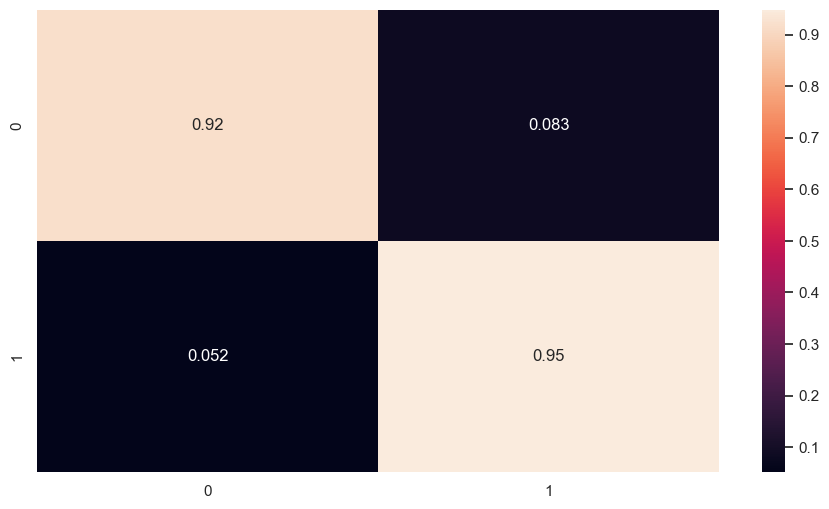

In [26]:
conf_mat = confusion_matrix(y_test, y_pred,normalize='true')
sns.heatmap(conf_mat, annot=True)

## K-Nearest Neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_onehot, y_ovr_samp)

KNeighborsClassifier()

In [28]:
#Testing time may take long
print('Training accuracy: ', knn.score(X_train_onehot,y_ovr_samp))
print('Testing accuracy: ', knn.score(X_test_preprocess, y_test))

Training accuracy: 

 0.953125
Testing accuracy:  0.9038461538461539


In [29]:
knn_pred = knn.predict(X_test_preprocess)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        60
           1       0.96      0.89      0.92        96

    accuracy                           0.90       156
   macro avg       0.90      0.91      0.90       156
weighted avg       0.91      0.90      0.90       156



<AxesSubplot: >

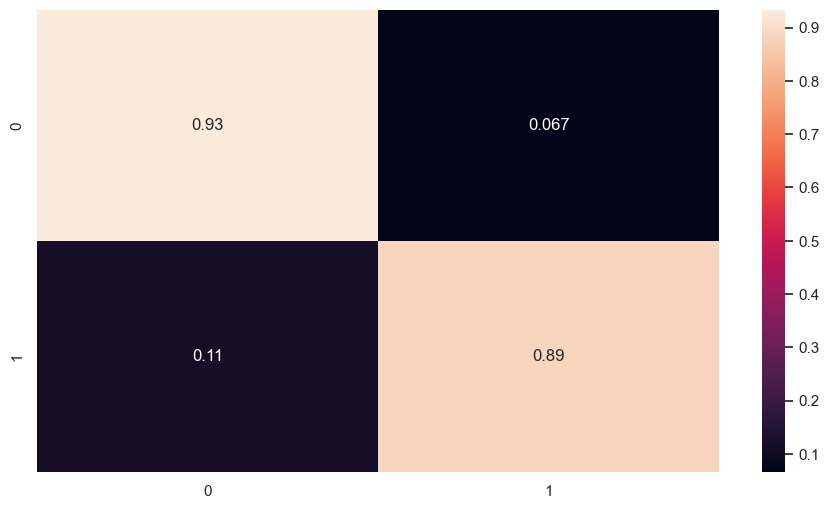

In [30]:
knn_conf_mat = confusion_matrix(y_test, knn_pred,normalize='true')
sns.heatmap(knn_conf_mat, annot=True)

Training accuracy:  0.7008928571428571
Testing accuracy:  0.6602564102564102
              precision    recall  f1-score   support

           0       0.55      0.70      0.61        60
           1       0.77      0.64      0.70        96

    accuracy                           0.66       156
   macro avg       0.66      0.67      0.66       156
weighted avg       0.68      0.66      0.66       156



<AxesSubplot: >

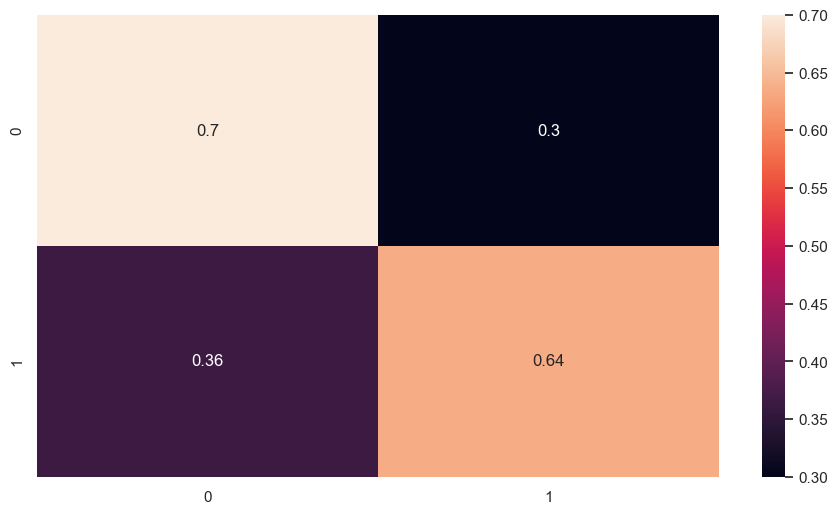

In [31]:
#KNN for numerical attributes
knn_num = KNeighborsClassifier(n_neighbors=5)
knn_num.fit(X_train_onehot[num_attributes], y_ovr_samp)

print('Training accuracy: ', knn_num.score(X_train_onehot[num_attributes],y_ovr_samp))
print('Testing accuracy: ', knn_num.score(X_test_preprocess[num_attributes], y_test))
knn_num_pred = knn_num.predict(X_test_preprocess[num_attributes])

print(classification_report(y_test, knn_num_pred))
knn_num_conf_mat = confusion_matrix(y_test, knn_num_pred,normalize='true')
sns.heatmap(knn_num_conf_mat, annot=True)

Testing accuracy 0.6923076923076923


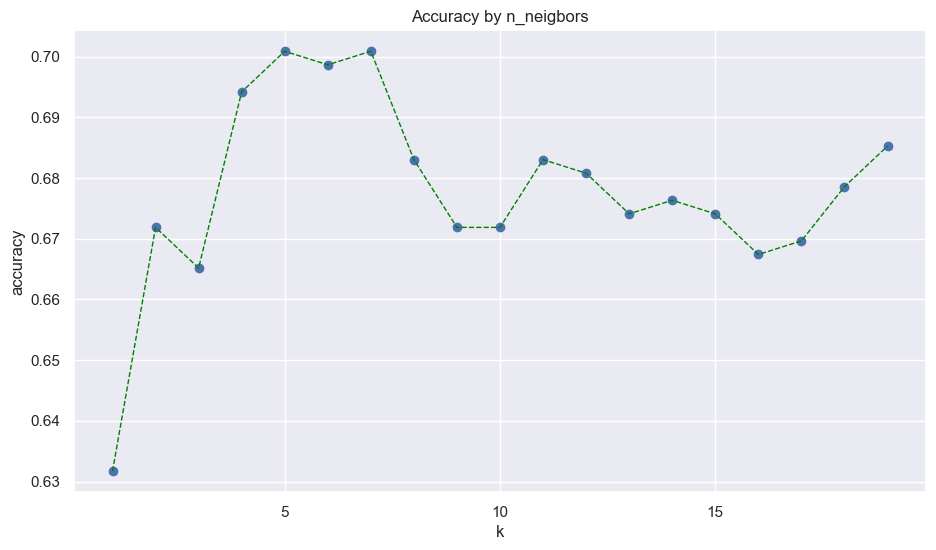

In [32]:
#long processing time due to multiple model training and prediction
k_range = range(1,20)
scores = []

for k in k_range:
    knn3 = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    knn3.fit(X_train_onehot[num_attributes], y_ovr_samp)
    knn3_pred = knn3.predict(X_train_onehot[num_attributes])
    scores.append(knn3.score(X_train_onehot[num_attributes], y_ovr_samp))
print('Testing accuracy',knn3.score(X_test_preprocess[num_attributes], y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy by n_neigbors')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);
plt.plot(k_range, scores, color='green', linestyle='dashed', linewidth=1, markersize=5)
plt.show()

### Naive Bayes Classifier

Training accuracy:  0.5290178571428571
Testing accuracy:  0.5064102564102564
              precision    recall  f1-score   support

           0       0.41      0.68      0.52        60
           1       0.67      0.40      0.50        96

    accuracy                           0.51       156
   macro avg       0.54      0.54      0.51       156
weighted avg       0.57      0.51      0.50       156



<AxesSubplot: >

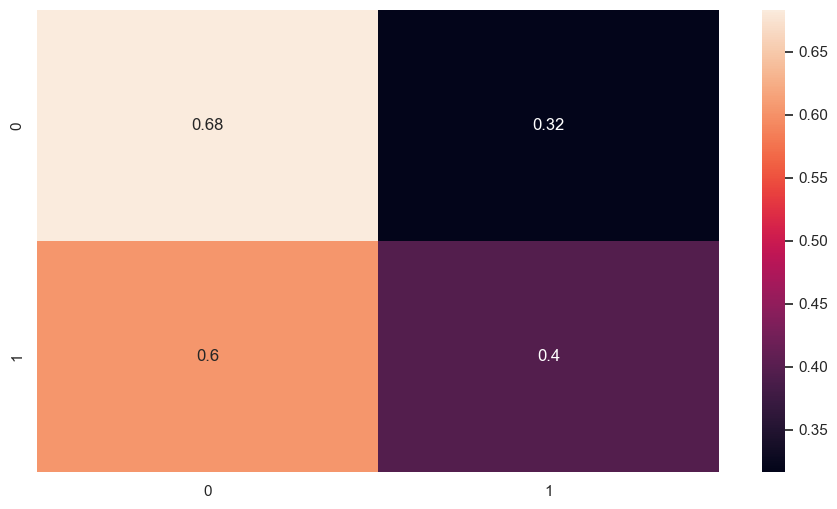

In [33]:
from sklearn.naive_bayes import GaussianNB

Gnb = GaussianNB()
Gnb.fit(X_train_onehot[num_attributes], y_ovr_samp)
print('Training accuracy: ', Gnb.score(X_train_onehot[num_attributes],y_ovr_samp))
print('Testing accuracy: ', Gnb.score(X_test_preprocess[num_attributes], y_test))
Gnb_pred = Gnb.predict(X_test_preprocess[num_attributes])
print(classification_report(y_test, Gnb_pred))
Gnb_conf_mat = confusion_matrix(y_test, Gnb_pred,normalize='true')
sns.heatmap(Gnb_conf_mat, annot=True)

In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()#initialize encoder
#similar process to the one-hot encoding process
X_train_rows = len(X_ovr_samp) #save the number of rows of training data
X_train_test = pd.concat(objs=[X_ovr_samp, X_test], axis=0) #concatenate the training and testing attributes
X_train_test_encoded = X_train_test[cat_attributes].apply(label_encoder.fit_transform) #encode categorical attributes to numerical format
#split the training and testing attributes back into individual variables
X_train_encoded = X_train_test_encoded[:X_train_rows]
X_test_encoded = X_train_test_encoded[X_train_rows:]

display(X_train_encoded)

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,1,0,0,0,1,1,0,1,1,0,1,0,0,1,0
1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,1,0,1,1,1,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
444,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
445,1,1,0,1,1,0,1,0,1,0,1,0,0,1,1
446,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0


Training accuracy:  0.8883928571428571
Testing accuracy:  0.8846153846153846
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        60
           1       0.95      0.85      0.90        96

    accuracy                           0.88       156
   macro avg       0.88      0.89      0.88       156
weighted avg       0.89      0.88      0.89       156



<AxesSubplot: >

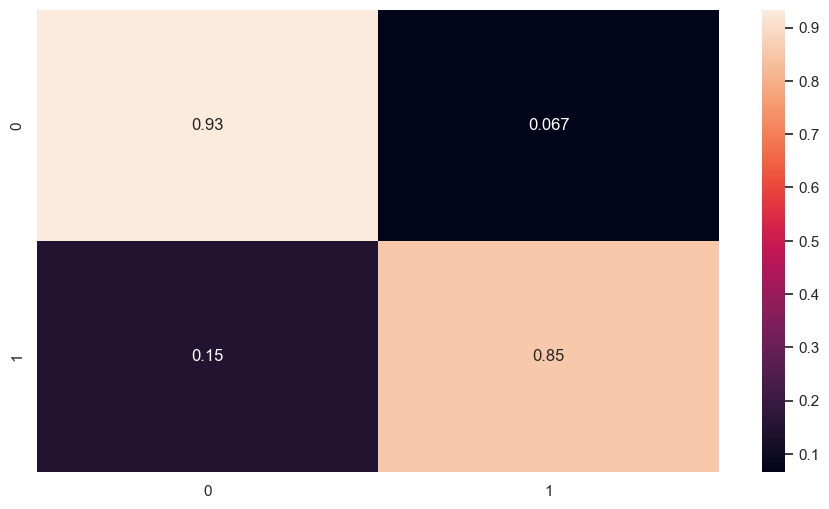

In [35]:
from sklearn.naive_bayes import CategoricalNB

Cnb = CategoricalNB()
Cnb.fit(X_train_encoded, y_ovr_samp)
print('Training accuracy: ', Cnb.score(X_train_encoded,y_ovr_samp))
print('Testing accuracy: ', Cnb.score(X_test_encoded, y_test))
Cnb_pred = Cnb.predict(X_test_encoded)
print(classification_report(y_test, Cnb_pred))
Cnb_conf_mat = confusion_matrix(y_test, Cnb_pred,normalize='true')
sns.heatmap(Cnb_conf_mat, annot=True)

In [36]:
models = ['Logistic Regression', 'k-NN with Cat', 'k-NN', 'Gaussian NB', 'Categorical NB']

LR_tra_acc = logreg.score(X_train_onehot,y_ovr_samp)
knn_tra_acc = knn.score(X_train_onehot,y_ovr_samp)
knn_num_tra_acc = knn_num.score(X_train_onehot[num_attributes],y_ovr_samp)
Gnb_tra_acc = Gnb.score(X_train_onehot[num_attributes],y_ovr_samp)
Cnb_tra_acc =  Cnb.score(X_train_encoded,y_ovr_samp)

LR_test_acc = logreg.score(X_test_preprocess,y_test)
knn_test_acc = knn.score(X_test_preprocess,y_test)
knn_num_test_acc = knn_num.score(X_test_preprocess[num_attributes],y_test)
Gnb_test_acc = Gnb.score(X_test_preprocess[num_attributes],y_test)
Cnb_test_acc =  Cnb.score(X_test_encoded,y_test)

results = [[models[0],LR_tra_acc,LR_test_acc],
           [models[1],knn_tra_acc,knn_test_acc],
           [models[2],knn_num_tra_acc,knn_num_test_acc],
           [models[3],Gnb_tra_acc,Gnb_test_acc],
           [models[4],Cnb_tra_acc,Cnb_test_acc]]

results_table = pd.DataFrame(results, columns=['Model', 'Training Acc.', 'Testing Acc.'])
display(results_table)


,Model,Training Acc.,Testing Acc.
0,Logistic Regression,0.957589,0.935897
1,k-NN with Cat,0.953125,0.903846
2,k-NN,0.700893,0.660256
3,Gaussian NB,0.529018,0.506410
4,Categorical NB,0.888393,0.884615
